## Прогнозирование временных рядов

### Тест 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [28]:
milk = pd.read_csv('monthly-milk-production.csv',';',
                   index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


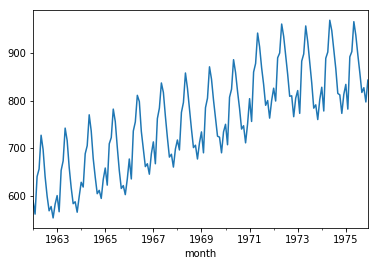

In [6]:
milk['milk'].plot()
plt.show()

In [25]:
print(f"Dickey-Fuller test, p-value = {sm.tsa.stattools.adfuller(milk['milk'])[1]}")

Dickey-Fuller test, p-value = 0.6274267086030337


In [29]:
#smoothing the series
milk['milk_daily'] = milk['milk'] / milk.index.days_in_month

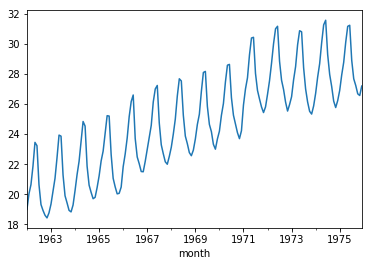

In [30]:
milk['milk_daily'].plot()
plt.show()

In [15]:
milk['milk_div'].sum()

4166.326661899466

### Тест 3

In [33]:
milk['milk_daily_diff1'] = milk['milk_daily'] - milk['milk_daily'].shift(1)

In [35]:
print(f"Dickey-Fuller test, p-value = {sm.tsa.stattools.adfuller(milk['milk_daily_diff1'][1:])[1]}")

Dickey-Fuller test, p-value = 0.06430054654174037


In [38]:
milk['milk_daily_diff12'] = milk['milk_daily'] - milk['milk_daily'].shift(12)

In [43]:
print(f"Dickey-Fuller test, p-value = {sm.tsa.stattools.adfuller(milk['milk_daily_diff12'][12:])[1]}")

Dickey-Fuller test, p-value = 0.22127672658830383


In [44]:
milk['milk_daily_diff12_1'] = milk['milk_daily_diff12'] - milk['milk_daily_diff12'].shift(1)

In [45]:
print(f"Dickey-Fuller test, p-value = {sm.tsa.stattools.adfuller(milk['milk_daily_diff12_1'][13:])[1]}")

Dickey-Fuller test, p-value = 2.2808455518037347e-06


In [46]:
milk['milk_daily_diff1_12'] = milk['milk_daily_diff1'] - milk['milk_daily_diff1'].shift(12)

In [47]:
print(f"Dickey-Fuller test, p-value = {sm.tsa.stattools.adfuller(milk['milk_daily_diff1_12'][13:])[1]}")

Dickey-Fuller test, p-value = 2.2808455518037347e-06


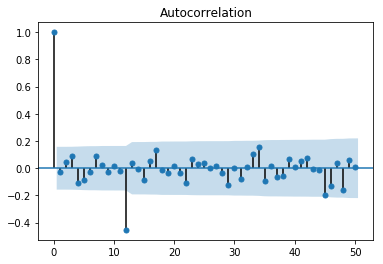

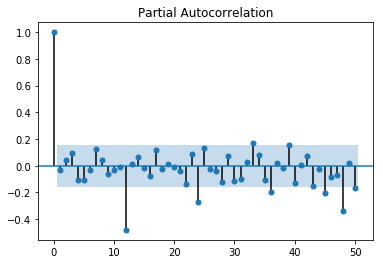

In [79]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(milk['milk_daily_diff12_1'][13:].values.squeeze(), lags=50)
sm.graphics.tsa.plot_pacf(milk['milk_daily_diff12_1'][13:].values.squeeze(), lags=50)
plt.show()